In [19]:
"""
Aman Arya
CSE 415
1535134
A7: Part B
Fake News Classification via Naive Bayes and LSA
"""
%matplotlib inline
import itertools
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import cross_val_score

In [3]:
# Import `fake_or_real_news.csv` 
df = pd.read_csv("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/fake_or_real_news.csv")

In [4]:
df.shape

(6335, 4)

In [5]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
df = df.set_index("Unnamed: 0") 
df.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [23]:
y = df.label 
df.drop("label", axis=1)
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.2, random_state=53)
X_train

Unnamed: 0
5139     The supreme court justice Ruth Bader Ginsburg ...
8483     Meteor, space junk, rocket? Mysterious flash h...
2561     During the campaign, Trump had threatened to i...
3220     In a shift of opinion since the 2014 midterms,...
7476     Freedom Center Urges College Presidents to End...
3373     State Department officials have uncovered 17,8...
7380     Or, how to stop worrying and love staving off ...
1569     Watch the CNN Republican debate Tuesday, Decem...
3613     When the news broke that our French colleagues...
9825     Happy Birthday, Hillary. You were destined to ...
6891     I Dont Actualy Like Trump thoif yu like him th...
8962     Carmela Tyrell November 3, 2016 How To Choose ...
2421     The United States and Cuba have taken major st...
6564     This is how it works in the Clinton Cabal...or...
4212     Just how far could Republicans go to deny Dona...
1396     "Today I was shown a piece of literature from ...
5305     Share on Twitter \nSen. Mark Kirk (R

In [24]:
# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [9]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [25]:
clf = LogisticRegression(penalty="l2")

Logistic Regression F1 and Accuracy Scores : 

F1 score 91.87%
Accuracy score 91.87%
Confusion matrix, without normalization


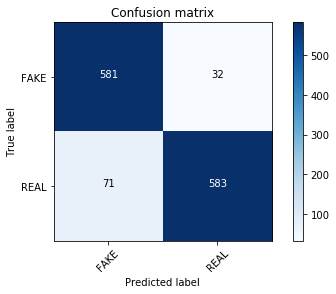

In [26]:
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
print "Logistic Regression F1 and Accuracy Scores : \n"
print ( "F1 score {:.4}%".format( metrics.f1_score(y_test, pred, average='macro')*100 ) )
print ( "Accuracy score {:.4}%".format(metrics.accuracy_score(y_test, pred)*100) )
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [27]:
scores = cross_val_score(clf, tfidf_train, y_train, cv=5)
scores

array([ 0.90640394,  0.91617357,  0.90720632,  0.92102665,  0.90029615])

In [28]:
clf = MultinomialNB()

accuracy:   0.867
Confusion matrix, without normalization


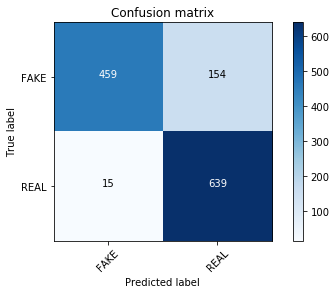

In [29]:
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
svd = TruncatedSVD(n_components=100)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

In [ ]:
X = lsa.fit(tfidf_train)